In [1]:
from __future__ import print_function # to use Python 3 features in Python 2

%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt

import numpy as np

from astropy import constants as const

/Users/egentry/anaconda/lib/python3.4/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


# Line Plot

In [2]:
def gaussian(x, sigma=2):
    y = (2*np.pi*sigma**2)**-0.5 * np.exp(- x**2 / (2 * sigma**2)) 
    return y

x = np.linspace(-10,10)
y = gaussian(x)

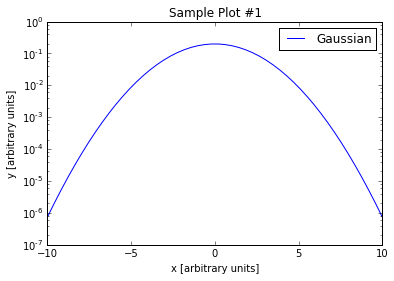

In [3]:
plt.plot(x, y, label="Gaussian")

plt.title("Sample Plot #1")

plt.xlabel("x [arbitrary units]")
plt.ylabel("y [arbitrary units]")

plt.legend(loc="best")

plt.yscale("log")


# Scatter Plot

In [4]:
import sys
sys.path.insert(0, "../day2") # to access exoplanets.py

import exoplanets
exoplanets.download_data()
data = exoplanets.parse_data()

In [5]:
data.dtype.names

('pl_hostname',
 'pl_letter',
 'pl_orbsmax',
 'pl_orbsmaxerr1',
 'pl_orbsmaxerr2',
 'pl_bmassj',
 'pl_bmassjerr1',
 'pl_bmassjerr2',
 'st_lum')

In [6]:
# pull up `plt.errorbar` documentation
plt.errorbar?

(0.01, 10000)

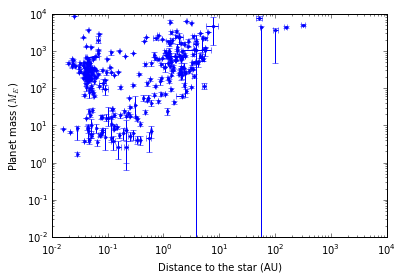

In [7]:
planet_distances = data["pl_orbsmax"]
planet_distances_err = np.array([data["pl_orbsmaxerr1"],
                                 data["pl_orbsmaxerr2"] * -1])

planet_masses     = data["pl_bmassj"] *(const.M_jup / const.M_earth)
planet_masses_err = np.array([data["pl_bmassjerr1"],
                              data["pl_bmassjerr2"] *-1])*(const.M_jup / const.M_earth)


plt.errorbar(planet_distances, 
             planet_masses,
             fmt=".",
             xerr = planet_distances_err,
             yerr = planet_masses_err)

plt.xscale("log")
plt.yscale("log")

plt.xlabel("Distance to the star (AU)")
plt.ylabel("Planet mass ($M_E$)")

plt.xlim(10**-2, 10**4)
plt.ylim(10**-2, 10**4)

# Subplots

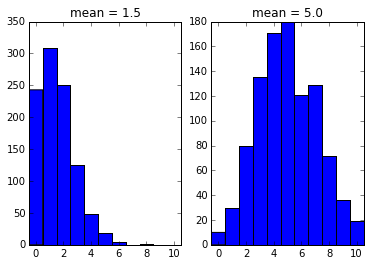

In [8]:
N_samples = 1000
lambda_1 = 1.5
lambda_2 = 5.0

poisson_samples_1 = np.random.poisson(lam=lambda_1, size=N_samples)
poisson_samples_2 = np.random.poisson(lam=lambda_2, size=N_samples)

bin_edges = np.arange(-.5, 11.5)

f, (ax1, ax2) = plt.subplots(1,2)
ax1.hist(poisson_samples_1, bins = bin_edges)
ax2.hist(poisson_samples_2, bins = bin_edges)

ax1.set_xlim(bin_edges.min(), bin_edges.max())
ax2.set_xlim(bin_edges.min(), bin_edges.max())

ax1.set_title("mean = " + str(lambda_1))
ax2.set_title("mean = " + str(lambda_2))


### Seaborn distribution plotting:

In [9]:
rc_orig = mpl.rcParams.copy()
import seaborn as sns
sns.set_style(rc = rc_orig) # keep matplotlib default aesthetics

In [10]:
sns.distplot?
# creates a histogram, along with a "KDE" curve,
# which estimates the shape of the distribution

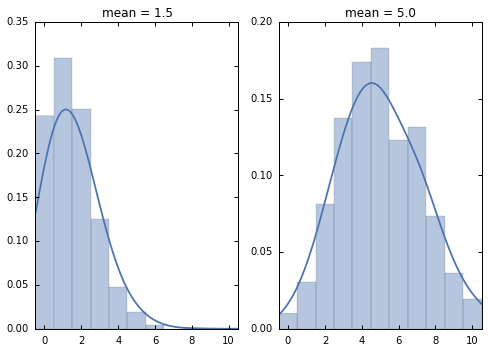

In [11]:
f, (ax1, ax2) = plt.subplots(1,2)

sns.distplot(poisson_samples_1, 
             bins=bin_edges,
             kde_kws={"bw":1}, # set smoothing width of KDE
             ax=ax1)


sns.distplot(poisson_samples_2, 
             bins=bin_edges,
             kde_kws={"bw":1}, # set smoothing width of KDE
             ax=ax2)

ax1.set_xlim(bin_edges.min(), bin_edges.max())
ax2.set_xlim(bin_edges.min(), bin_edges.max())

ax1.set_title("mean = " + str(lambda_1))
ax2.set_title("mean = " + str(lambda_2))


# 2D hist

In [12]:
means = [1,2]
covariances = [[5,1],[1,1]]
data1 = np.random.multivariate_normal(mean=means, cov=covariances, size=100000)

means = [6.75, 4.5]
data2 = np.random.multivariate_normal(mean=means, cov=covariances, size=100000)

data = np.append(data1, data2, axis=0)
data = data.T

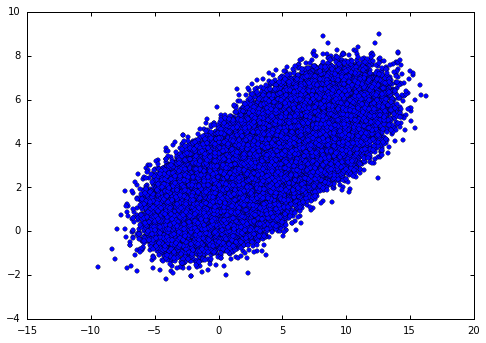

In [13]:
plt.scatter(data[0], data[1])

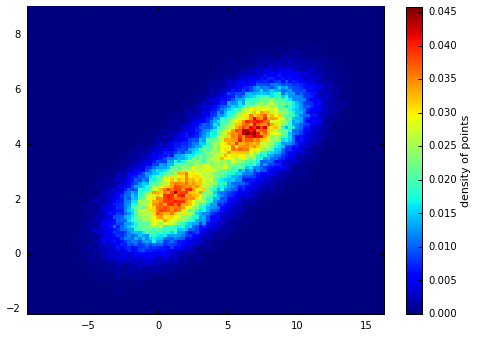

In [14]:
plt.hist2d(data[0], data[1], bins=100, normed=True)
plt.colorbar(label="density of points")